In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Mean

In [3]:
mean_bill = df['total_bill'].mean()
mean_bill

19.78594262295082

In [4]:
mode_bill = df['total_bill'].mode()
mode_bill

0    13.42
Name: total_bill, dtype: float64

In [5]:
median_bill = df['total_bill'].median()
median_bill

17.795

In [6]:
#Range
range_bill = df['total_bill'].max() - df['total_bill'].min()
range_bill 

47.74

In [7]:
# Variance
var_bill = df['total_bill'].var()
var_bill

79.25293861397827

In [8]:
#Standarad 
std_bill = df['total_bill'].std()
std_bill

8.902411954856856

In [12]:
# Frequency Distributions
frequency_distribution = df['total_bill'].value_counts().sort_index()
frequency_distribution.head()

total_bill
3.07    1
5.75    1
7.25    2
7.51    1
7.56    1
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt


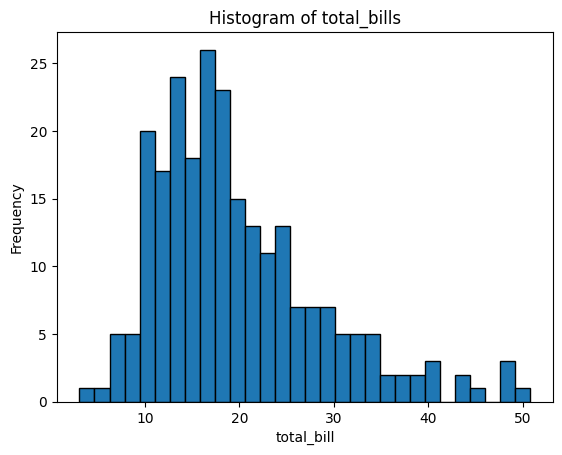

In [18]:
# Histogram
plt.hist(df['total_bill'], bins=30, edgecolor='black')
plt.title('Histogram of total_bills')
plt.xlabel('total_bill')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# Diagnostic Analytics:


In [20]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [21]:
df = sns.load_dataset("tips")

# Display the first few rows of the dataset
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Pearson Correlation Coefficient


In [22]:
# Pearson correlation coefficient
pearson_corr = df[['total_bill', 'tip']].corr(method='pearson')
print('Pearson Correlation Coefficient:')
print(pearson_corr)


Pearson Correlation Coefficient:
            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


In [25]:
import statsmodels.api as sm

# Linear regression: Predicting tip based on total_bill
X = df['total_bill']
y = df['tip']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           6.69e-34
Time:                        19:14:57   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

### 
- We fit an Ordinary Least Squares (OLS) regression model and print the summary, which includes coefficients, R-squared, p-values, and other statistics.


### Logistic Regression


In [27]:
# Creating a binary target variable for logistic regression for any above avg tip 
df['tip_above_avg'] = (df['tip'] > df['tip'].mean()).astype(int)

#The comparison >, greater than, checks whether each value in df['tip'] is greater than the mean of df['tip'].

# Logistic regression: Predicting tip_above_avg based on total_bill
X = df['total_bill']
y = df['tip_above_avg']
X = sm.add_constant(X)  # adding a constant

logit_model = sm.Logit(y, X).fit()
predictions = logit_model.predict(X)

print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.519708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          tip_above_avg   No. Observations:                  244
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                  0.2502
Time:                        19:40:13   Log-Likelihood:                -126.81
converged:                       True   LL-Null:                       -169.12
Covariance Type:            nonrobust   LLR p-value:                 3.612e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6275      0.521     -6.965      0.000      -4.648      -2.607
total_bill     0.1914      0.

### T Test 

In [28]:
# t-test: Are the average tips different for smokers and non-smokers?
smoker_ttest = stats.ttest_ind(df[df['smoker'] == 'Yes']['tip'], df[df['smoker'] == 'No']['tip'])
print(f"t-test result: {smoker_ttest}")


t-test result: TtestResult(statistic=0.09222805186888201, pvalue=0.9265931522244976, df=242.0)


#### Explanation:

- We perform an independent t-test to determine if the average tips are significantly different for smokers and non-smokers.
- We compare the means of the tip variable between the two groups (smoker and non-smoker).
- Since the p-value (0.9265931522244976) is greater than a typical significance level (e.g., 0.05), we fail to reject the null hypothesis that the mean tips are equal for smokers and non-smokers. This suggests that there is no statistically significant difference in tips between smokers and non-smokers.

- In other words, based on this data, we cannot conclude that there's a significant difference in tips between smokers and non-smokers.

### Chi-square Test

In [29]:
# Chi-square test: Is there a significant association between day and time?
contingency_table = pd.crosstab(df['day'], df['time'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-square test result: chi2={chi2}, p-value={p}")


Chi-square test result: chi2=217.1126728434853, p-value=8.449897551777147e-47


#### Interpretation:

- Since the p-value (8.449897551777147e-47) is extremely small, we reject the null hypothesis that there's no association between day and time. This suggests that there is a statistically significant association between these two variables.

- In other words, based on this data, we can conclude that there is a significant relationship between day and time. This might indicate that certain days of the week or times of day have different patterns or distributions of tips.

### Root Cause Analysis


In [31]:
# Convert categorical variables to numerical values using one-hot encoding
df_numeric = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Calculate the correlation of various factors with tip
correlation_with_tip = df_numeric.corr()['tip'].sort_values(ascending=False)
print('Correlation with Tip:')
print(correlation_with_tip)


Correlation with Tip:
tip              1.000000
tip_above_avg    0.748156
total_bill       0.675734
size             0.489299
day_Sun          0.125114
time_Dinner      0.121629
day_Sat         -0.002790
smoker_No       -0.005929
day_Fri         -0.055463
sex_Female      -0.088862
Name: tip, dtype: float64


- The highest correlation is with tip, which is not surprising since it's being correlated with itself!

- The next highest correlations are with total_bill (0.675734) and size (0.489299), which makes sense since these variables might be related to the amount of money spent or the number of people at a table, which could influence the tip.

- The correlations with the day of the week (day_Sun, day_Sat, etc.) are relatively small (around 0.1-0.2), suggesting that there may be some association between day of the week and tip, but it's not strong.

- The correlations with time of day (time_Dinner) are also relatively small (around 0.1-0.2), suggesting that there may be some association between time of day and tip, but it's not strong.

- The correlations with sex (sex_Female) and smoker status (smoker_No) are negative, indicating that female customers or non-smokers tend to leave smaller tips.

### Cohort analysis

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12608\1994486272.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_analysis = df.groupby('day')['total_bill'].mean()


Cohort Analysis (Average Total Bill per Day):
day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


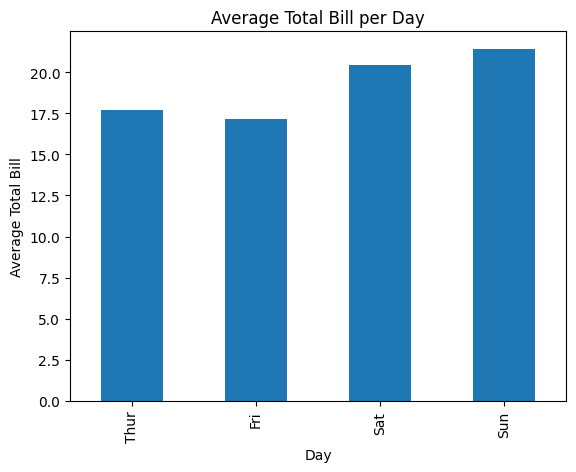

In [32]:
# Cohort analysis: Average total bill per day
cohort_analysis = df.groupby('day')['total_bill'].mean()
print('Cohort Analysis (Average Total Bill per Day):')
print(cohort_analysis)

# Plotting cohort analysis
cohort_analysis.plot(kind='bar')
plt.title('Average Total Bill per Day')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.show()


### Predictive Analytics


### Basic Probability Concepts


In [37]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
# Probability of getting a tip greater than $5
prob_tip_above_5 = (df['tip'] > 5).mean()
print(f"Probability of getting a tip greater than $5:", prob_tip_above_5)


Probability of getting a tip greater than $5: 0.07377049180327869


In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Machine Learning Algorithms

#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Decision Tree: Predicting tip based on total_bill and other features
X = df[['total_bill', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)
print(f"Decision Tree Top 5 Predictions: {tree_predictions[:5]}")


Decision Tree Top 5 Predictions: [4.19 4.   3.61 4.34 2.  ]


In [53]:
mse = (1/len(tree_predictions)) * sum((tree_predictions - y_test) ** 2)
print("mse",mse)

mse 1.1041816326530611


#### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

# Linear Regression: Predicting tip based on total_bill
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

lin_reg_predictions = lin_reg_model.predict(X_test)
print(f"Linear Regression Predictions: {lin_reg_predictions[:5]}")


Linear Regression Predictions: [2.89943693 1.89520002 3.85933994 3.9811207  2.27962736]


In [57]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
lin_reg_cv_scores = cross_val_score(lin_reg_model, X, y, cv=5)
print(f"Linear Regression CV Scores: {lin_reg_cv_scores}")


Linear Regression CV Scores: [0.53404571 0.61085627 0.51123501 0.25355216 0.41897975]


In [58]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Get scores for each feature
feature_scores = selector.scores_
print(f"Feature scores: {feature_scores}")


Feature scores: [203.35772333  76.17542599]


### Prescriptive Analytics

In [59]:
from scipy.optimize import linprog

# Define the coefficients of the objective function (e.g., cost)
c = [50, 100, 150]  # cost per unit of food item

# Define the inequality constraints matrix and vector (e.g., nutritional requirements)
A = [
    [200, 300, 250],  # calories
    [30, 20, 50],     # protein
    [20, 10, 30]      # fat
]
b = [2000, 50, 70]  # required amounts

# Define the bounds for each variable (e.g., minimum and maximum quantities)
x_bounds = [(0, None), (0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

print(f"Optimal value: {result.fun}, Optimal quantities: {result.x}")


Optimal value: 0.0, Optimal quantities: [0. 0. 0.]


### What-if Analysis

In [60]:

# What-if analysis for changes in total_bill
total_bill_changes = np.arange(10, 101, 10)  # from $10 to $100 in steps of $10

for total_bill in total_bill_changes:
    predicted_tip = lin_reg_model.predict([[total_bill, 1]])[0]  # assuming size = 1
    print(f"If total_bill is ${total_bill}, predicted tip is ${predicted_tip:.2f}")


If total_bill is $10, predicted tip is $1.74
If total_bill is $20, predicted tip is $2.65
If total_bill is $30, predicted tip is $3.56
If total_bill is $40, predicted tip is $4.47
If total_bill is $50, predicted tip is $5.38
If total_bill is $60, predicted tip is $6.29
If total_bill is $70, predicted tip is $7.19
If total_bill is $80, predicted tip is $8.10
If total_bill is $90, predicted tip is $9.01
If total_bill is $100, predicted tip is $9.92


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line